# PDP
## PDP -  Assignment 2
Author: Mohammed AL-selmi <br>
Student number: 669668<br>
Date: 18-05-2023<br>

For this notebook to work we must have installed the following packages:
* numpy
* pandas
* plt
* sm
* sklearn
* seaborn

From these we will need the following libraries:

In [18]:
#Importing all the necessary modules
#enter here all those 'from .... import ....'
try:
    import pandas as pd
    print('pandas already installed, only imported')
except:
    !pip install pandas
    import pandas as pd
    print('pandas was not installed, installed and imported')    

# numpy as np
try:
    import numpy as np
    print('NumPy already installed, only imported')
except:
    !pip install numpy
    import numpy as np
    print('NumPy was not installed, installed and imported')
    
    
# pyplot as plt
try:
    import matplotlib.pyplot as plt
    print('PyPlot already installed, only imported')
except:
    !pip install matplotlib
    import matplotlib.pyplot as plt
    print('PyPlot was not installed, installed and imported')

try:
    import statsmodels.api as sm
    print('statsmodels already installed, only imported')
except:
    !pip install statsmodels
    import statsmodels.api as sm
    print('statsmodels was not installed, installed and imported')    
    
try:
    import seaborn as sns
    print('seaborn already installed, only imported')
except:
    !pip install seaborn
    import seaborn as sns
    print('seaborn was not installed, installed and imported')

try:
    import sklearn 
    print('sklearn already installed, only imported')
except:
    !pip install scikit-learn
    import sklearn
    print('sklearn was not installed, installed and imported')
    
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import median_absolute_error
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

pandas already installed, only imported
NumPy already installed, only imported
PyPlot already installed, only imported
statsmodels already installed, only imported
seaborn already installed, only imported
sklearn already installed, only imported


# 1. The Data
We are going to use the datafile Walmart Data Analysis and Forcasting.

In [2]:
# read the data
sales_df = pd.read_csv("Walmart Data Analysis and Forcasting.csv")

Here's a quick look at the data:

In [3]:
# Checking the first few rows of the dataset
sales_df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


Description of the Columns:

<b>Store</b>: the store number. <br>
<b>Date</b>: the week of sales.<br>
<b>Weekly_Sales</b>: the weekly sales for the given store.<br>
<b>Holiday_Flag</b>: whether the week is a special holiday week or not (1 = holiday week; 0 = non-holiday week).<br>
<b>Temperature</b>: average temperature in the region for the given week.<br>
<b>Fuel_Price</b>: cost of fuel in the region for the given week.<br>
<b>CPI</b>: the consumer price index for the given week.<br>
<b>Unemployment</b>: the unemployment rate for the region for the given week.<br>

In [4]:
# Checking the dimensions of the dataset
sales_df.shape

(6435, 8)

In [5]:
# Checking the data types of the columns
sales_df.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [6]:
# Checking for missing values
sales_df.isnull().sum()

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

Based on our dataset, we can conclude that it comprises 8 features, out of which 7 are independent variables, and the remaining feature is the dependent variable (Weekly_Sales). The dataset contains a total of 6435 rows and contains a numerical features. Additionally, there are no missing values in the dataset.

# 2. The correlation
We are going to use four different methods to measure the correlation between the numerical features and target column. The methods used are the following:
* Heatmap
* Scatter plots for each feature
* Feature importances
* SelectKBest <br>

we will start with the heatmap, by examining the heatmap, we can identify any strong correlations between the variables. The correlation coefficient ranges from -1 to 1, where a value of 1 indicates a perfect positive correlation, 0 indicates no correlation, and -1 indicates a perfect negative correlation. 

However it seems like we have to convert the date column to datetime instead of object in order to display the heatmap, in fact it would be better as well to create a new features using this column, therefore instead of data only we will have year, month and day:

In [8]:
# Convert the 'Date' column to a datetime object
sales_df['Date'] = pd.to_datetime(sales_df['Date'],format='mixed')

# Extract the year and month as new features
sales_df['Year'] = sales_df['Date'].dt.year
sales_df['Month'] = sales_df['Date'].dt.month
sales_df['Day'] = sales_df['Date'].dt.day

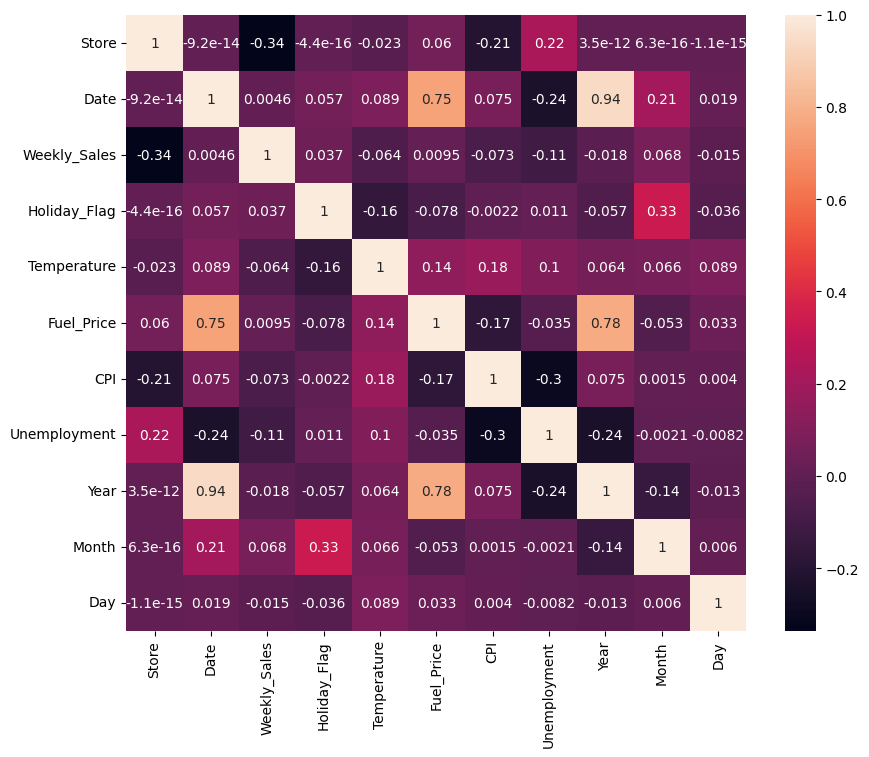

In [9]:
# heatmap of the data for checking the correlation between the numerical features and target column.
plt.figure(figsize=(10, 8))  
sns.heatmap(sales_df.corr(), annot=True)
plt.show()

Based on the heatmap above seems like there is a weak positive correlation between month and weekly sales as well as holiday flag and weekly sales. Let's try another method to measure the relationship which is plotting each feature, we will first define our numeric features before plotting them:

In [11]:
# Define the numeric features and the transformer for scaling
numeric_features = ['Year', 'Month', 'Day', 'Temperature', 'Fuel_Price', 'CPI', 'Unemployment']

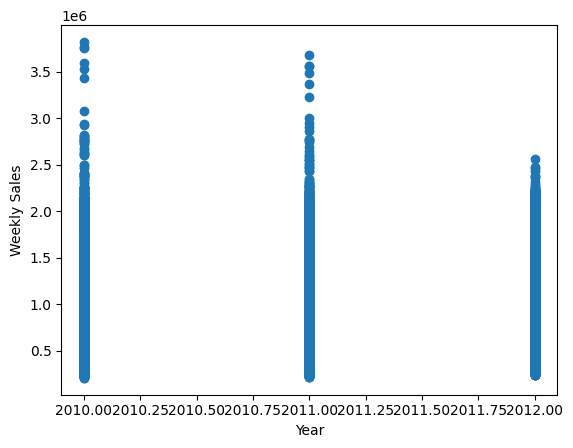

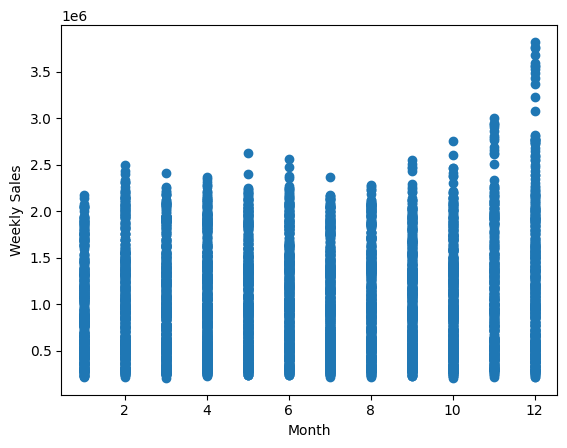

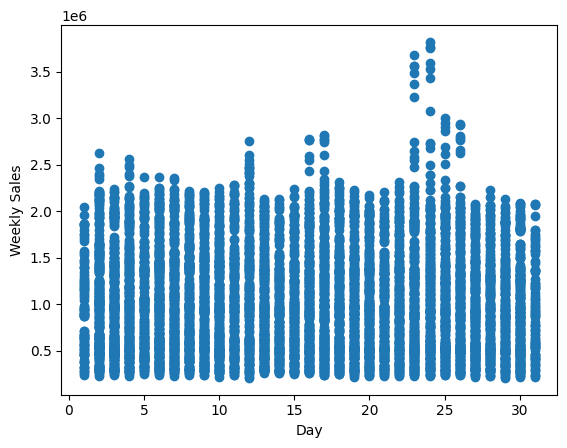

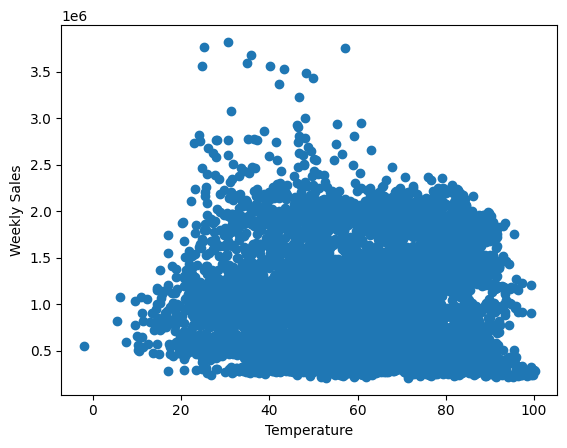

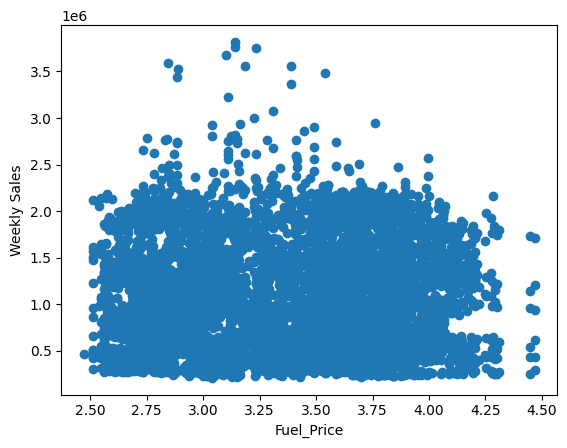

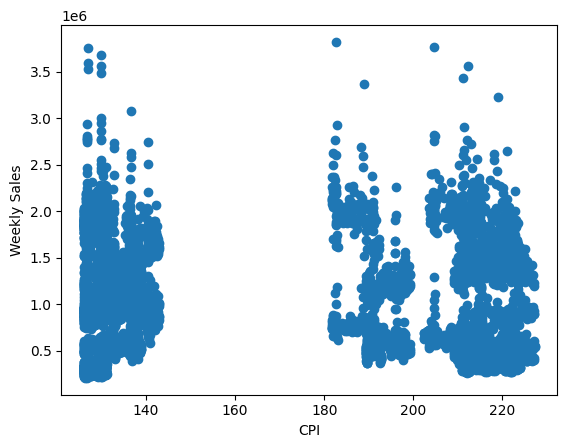

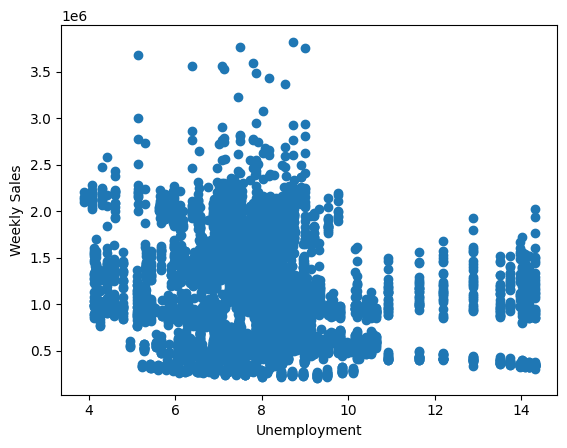

In [12]:
#  find the relationship between independent and dependent numerical features
for feature in numeric_features:
    plt.scatter(y=sales_df["Weekly_Sales"], x=sales_df[feature])
    plt.ylabel("Weekly Sales")
    plt.xlabel(feature)
    plt.show()
        

Even with plotting each feature, for this dataset it is difficult to determine which features we must choose, let's try different method which is selecting features according to the k highest scores, for this we need to define our independent and dependent variables:

In [16]:
# Select the x variables
X = sales_df.drop('Weekly_Sales', axis=1)
# drop the date  column
X = X.drop('Date',axis=1)
y = sales_df['Weekly_Sales']

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=3)
# Select top 3 features
X_new = selector.fit_transform(X, y)
selected_features = X.columns[selector.get_support(indices=True)]


# Print selected features from univariate selection
print("Selected Features from Univariate Selection:")
print(selected_features)

Selected Features from Univariate Selection:
Index(['Store', 'CPI', 'Unemployment'], dtype='object')


Looks like store, CPI, and unemployement were the features selected using this method, let's compare it using the lase method which is feature importances:

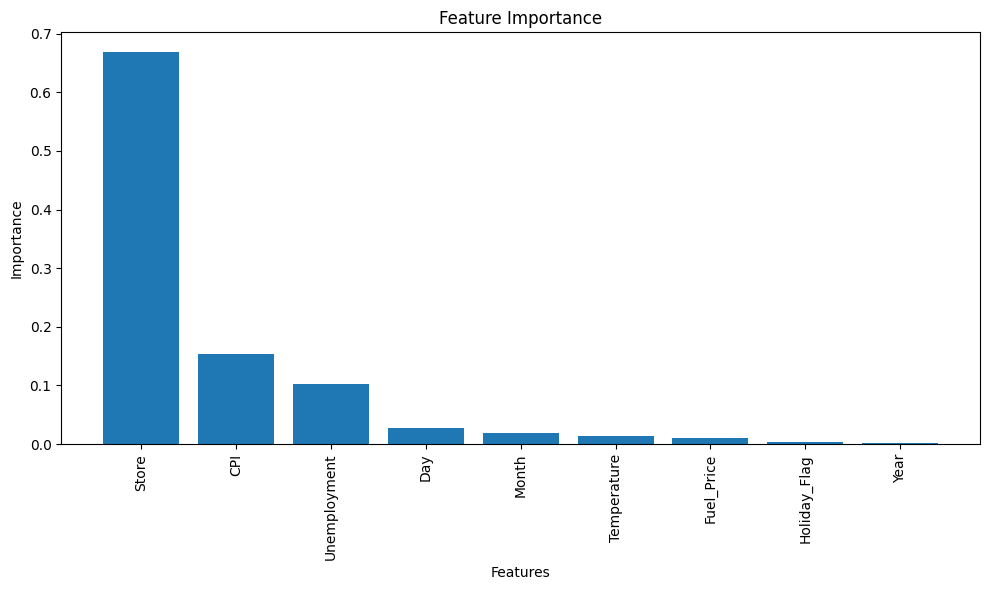

In [19]:
# Create a random forest regressor object
rf = RandomForestRegressor()

# Fit the random forest regressor to your data
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Rearrange feature names so they match the sorted feature importances
names = [X.columns[i] for i in indices]

# Plot feature importance
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.tight_layout()
plt.show()

Based on the above results we can perhaps conclude that store, CPI, and unemployement are the top three predictive features, therefore we will use them for our pipeline.

In [25]:
# Define the numeric features and the transformer for scaling
numeric_features = ['Store', 'CPI', 'Unemployment']

numeric_transformer = Pipeline(steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())])
                               
# Combine the numeric features and transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features)
    ])


clf = Pipeline(steps=[("preprocessor", preprocessor), ("classifier", LinearRegression())])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))

# Predict on the testing data
y_pred = clf.predict(X_test.iloc[4:5])
print("predicted score for next week sale for store number",X_test.iloc[4:5]["Store"].values[0]," is: %.3f" % y_pred)

model score: 0.164
predicted score for next week sale for store number 25 : 938445.668


run time for the pipeline

In [30]:
%%timeit
clf.fit(X_train, y_train)

5.92 ms ± 714 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [31]:
import time

# Start the timer
start_time = time.time()

# Fit the pipeline on the training data
clf.fit(X_train, y_train)

# Stop the timer and calculate the runtime
end_time = time.time()
runtime = end_time - start_time

print("Pipeline runtime:", runtime, "seconds")

Pipeline runtime: 0.009974479675292969 seconds


Evaluating the model:

In [32]:
#Calculating Mean Absolute Error
y_pred = clf.predict(X_test)
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Absolute Error Value is : ', MAEValue)

#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') 
print('Mean Squared Error Value is : ', MSEValue)

#Calculating Median Absolute Error
MdSEValue = median_absolute_error(y_test, y_pred)
print('Median Absolute Error Value is : ', MdSEValue )

adjDet=1-(1-clf.score(X_test, y_test))*(y_train.shape[0]-1)/(y_train.shape[0]-X_test.shape[1]-1)

print('Adjusted Determination Coefficient : ', adjDet)

Mean Absolute Error Value is :  419991.7382599565
Mean Squared Error Value is :  264120579098.52258
Median Absolute Error Value is :  382621.61785630276
Adjusted Determination Coefficient :  0.16287671006860338


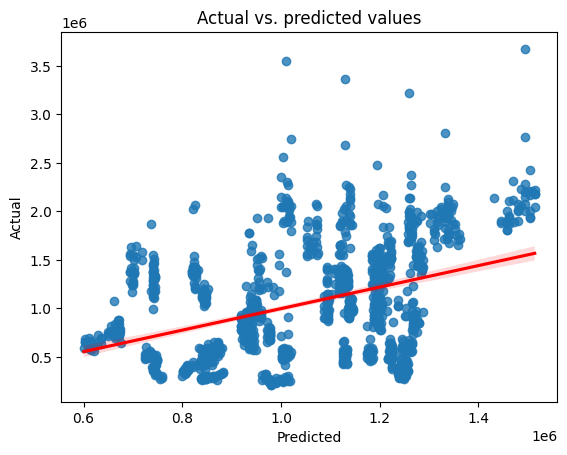

In [33]:
# Check the linearity assumption
sns.regplot(x=y_pred, y=y_test, line_kws={'color': 'red'})
plt.title('Actual vs. predicted values')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()